# Initial Contribution

# Importing libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load data and observe the dataset structure itself by calling head() and info()

In [0]:
df = pd.read_csv('initial_contribution/dataset.csv')

In [0]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Let's see how many missing values we have at each column

In [0]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## Now I know that I'm dealing with 81 columns and overall 1460 rows. There are some features with considarable amount of missing values. First thought is to delete them or replace with other values, but before that I have to analyze and find out the reason why those values are missing


## As a starting point I desided to look at a correlation of features to find some usefull insights. However, to deal with all 81 columns is enormous amount of work and to look at every cell of correlation map I have to have respective amount of time. So, firstly, I have to find out useful features for my further analysis and prediction it will somehow help me to reduce amount of columns to work with.


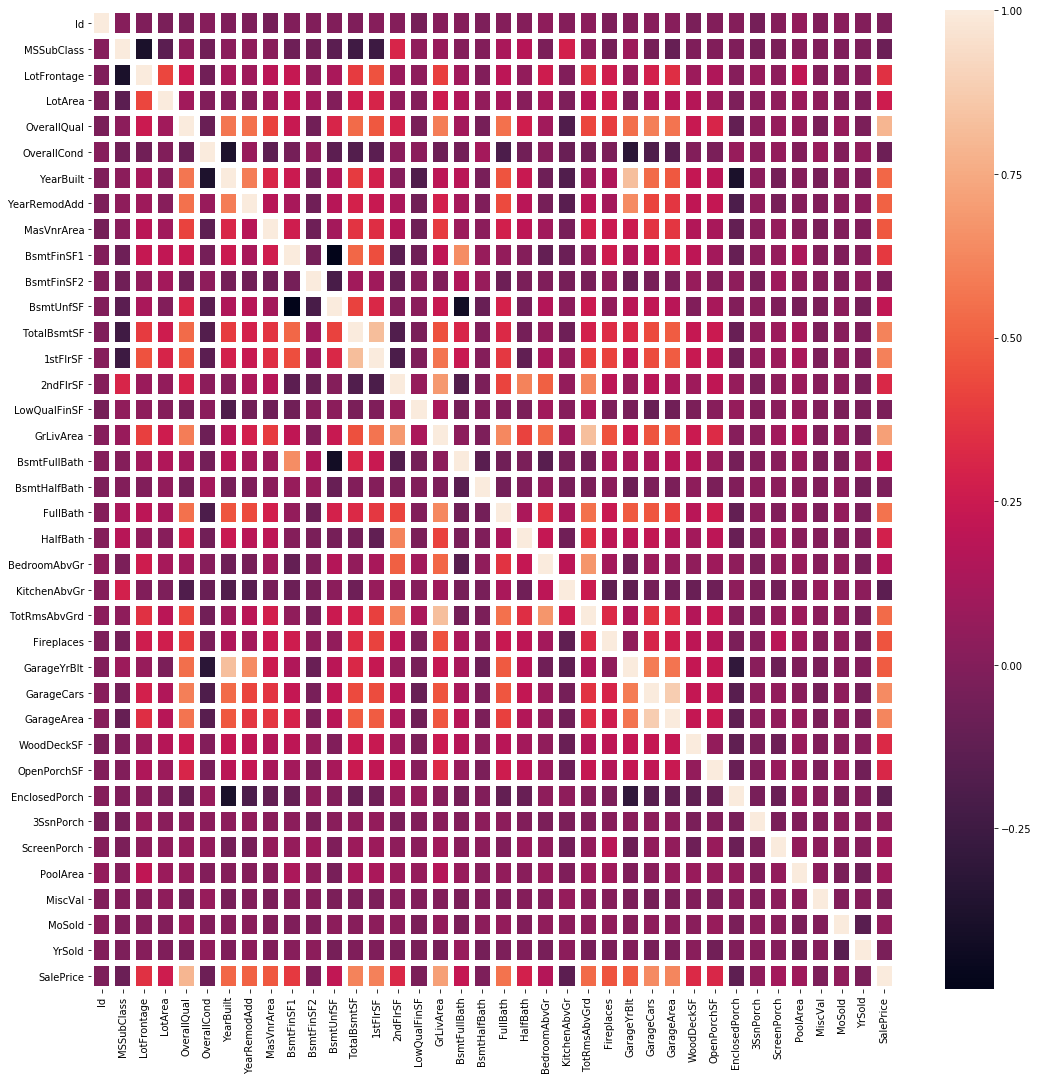

In [0]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),linewidths=5,fmt='.1f',ax=ax)
plt.show()

#### From the heatmap above I can say that columns like OverallQual, GrLivArea, TotalBsmtSF and GarageCars are highly correlate with SalePrice column 

# Feature selection

### Below I wrote small pipeline to perform Label Encoding to use it further for feature selection

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline, make_pipeline

class LabelEncoderBlock(BaseEstimator, TransformerMixin):
    """
        Description: Performs label encoding on pandas dataframe
        Dependency: pandas
    """
    def __init__(self, _columns, _save_nan = True):
        """
        Input: 
            _columns(list or np.array)
            _save_nan(Boolean)
        Dependency: pandas
        """
        self.__cols = _columns
        self.size = len(_columns)
        self.save_nan = _save_nan

    def fit(self, X, y = None): 
        self.present_columns = list(X.columns.values); return self
    
    def transform(self, X):
        
        columns = self.__cols
        for i in range(0, self.size):
            if columns[i] in self.present_columns:
                X.loc[:,columns[i]] = pd.factorize(X[columns[i]])[0]
                X.loc[:,columns[i]] = X.loc[:,columns[i]].astype('category')
        
        if self.save_nan == True:
          for i in range(0, self.size):
              if columns[i] in self.present_columns:
                  X.loc[:, columns[i]].replace(-1, np.NAN, inplace = True)
        return X


class Object2Label(BaseEstimator, TransformerMixin): # Valid
    """ 
    Description:  does label encoding on columns with object datatype
    """
    def fit(self, X, y = None):

        # Selecting an object column
        self.columns = list(X.select_dtypes(include=['object']).columns.values)
        self.col_amount = len(self.columns)
        if (len(self.columns) > 0):
          self.label_encoder = LabelEncoderBlock(self.columns)
          self.label_encoder.fit(X)
        return self
    
    def transform(self, X):
        if (self.col_amount > 0):
          return self.label_encoder.transform(X)
        else:
          return X




In [0]:
df_temp = df.copy()

# X & Y
X = df_temp.iloc[:,1:-1]
y = df_temp.iloc[:,-1]

### Next, I want to preprocess data for feature selection. I run my pipline from above and it: Labels data, imputes missing values and normalizes them 



In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

preprocessor = make_pipeline(Object2Label(),
               SimpleImputer(),
               MinMaxScaler(),
              )

X_prep = preprocessor.fit_transform(X)

### For feature selection I used *statsmodel* library for Ordinary Least Sqares.(It performs good on statistical operations)

In [0]:
model = sm.OLS(y,X_prep).fit()

### Save column names and index to the seperate csv file for navigation in further steps

In [0]:
pd.DataFrame({
    'X': np.arange(X_prep.shape[1]),
    'Name': X.columns
}).to_csv('Cols.csv')

### Let's see the result of OLS

In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              736.9
Date:                Thu, 10 Oct 2019   Prob (F-statistic):                        0.00
Time:                        04:40:40   Log-Likelihood:                         -17146.
No. Observations:                1460   AIC:                                  3.445e+04
Df Residuals:                    1383   BIC:                                  3.485e+04
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.589e+04   7615.709     -2.087      0.037   -3.08e+04    -955.344
x2         -2598.5716   4948.505     -0.525      0.600   -1.23e+04    7108.815
x3         -2.591e+04   1.44e+04     -1.796      0.073   -5.42e+04    2397.413
x4          8.498e+04   2.29e+04      3.711      0.000    4.01e+04     1.3e+05
x5         -2.953e+04   1.38e+04     -2.136      0.033   -5.66e+04   -2415.261
x6          8082.8553   7142.446      1.132      0.258   -5928.344    2.21e+04
x7          3120.6122   5027.360      0.621      0.535   -6741.464     1.3e+04
x8          7177.3042   4673.197      1.536      0.125   -1990.017    1.63e+04
x9         -5.326e+04   3.29e+04     -1.620      0.105   -1.18e+05    1.12e+04
x10         5133.3285   3528.306      1.455      0.146   -1788.081    1.21e+04
x11         1.316e+04   7928.087      1.660      0.097   -2392.664    2.87e+04
x12        -6002.1509   3873.129     -1.550      0.121   -1.36e+04    1595.691
x13        -2.066e+04   5730.114     -3.605      0.000   -3.19e+04   -9415.937
x14         -6.91e+04   1.68e+04     -4.110      0.000   -1.02e+05   -3.61e+04
x15        -1.174e+04   7039.736     -1.668      0.096   -2.56e+04    2066.414
x16         1494.1430   5595.657      0.267      0.789   -9482.750    1.25e+04
x17         1.292e+05   1.01e+04     12.848      0.000    1.09e+05    1.49e+05
x18           5.8e+04   7837.246      7.400      0.000    4.26e+04    7.34e+04
x19         6.546e+04   9747.173      6.715      0.000    4.63e+04    8.46e+04
x20         5395.7588   4039.693      1.336      0.182   -2528.829    1.33e+04
x21         3.295e+04   8515.998      3.869      0.000    1.62e+04    4.97e+04
x22         -7.49e+04   1.39e+04     -5.380      0.000   -1.02e+05   -4.76e+04
x23        -1.029e+04   7466.031     -1.378      0.168   -2.49e+04    4358.192
x24         1.285e+04   7633.175      1.684      0.092   -2122.911    2.78e+04
x25         1.178e+04   4377.346      2.690      0.007    3188.977    2.04e+04
x26         4.508e+04   9383.315      4.804      0.000    2.67e+04    6.35e+04
x27         6947.7370   5984.942      1.161      0.246   -4792.808    1.87e+04
x28         4521.8682   8207.259      0.551      0.582   -1.16e+04    2.06e+04
x29        -5631.8887   7425.134     -0.758      0.448   -2.02e+04    8933.855
x30         2.335e+04   4373.222      5.340      0.000    1.48e+04    3.19e+04
x31        -7204.6032   6643.784     -1.084      0.278   -2.02e+04    5828.380
x32         6312.2931   2497.382      2.528      0.012    1413.227    1.12e+04
x33        -6700.1662   3640.748     -1.840      0.066   -1.38e+04     441.819
x34         3.823e+04   1.33e+04      2.872      0.004    1.21e+04    6.43e+04
x35        -9240.8572   6337.834     -1.458      0.145   -2.1

# 35 columns with P-value > t

### OLS model summary calculated and gave us "P > |t|" column, which tells me about importance of each feature. I picked the features that are less than 0.05 at that column and, as a result, I ended up with 35 columns

In [0]:
cols = pd.read_csv('drive/My Drive/Cols.csv')

### This is the name and the index of each column name I exported from previous steps and now I want to see which columns turned out to be useful in predicting SalePrice

In [0]:
cols.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
X,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
Name,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


### Write those 35 columns into seperate dataframe. 
#### So far, the chosen features seems to be reasonable in SalePrice predicting.

In [0]:
vals = df[['MSSubClass', 'LotArea', 'Street', 'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle',
   'RoofMatl', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
   'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 
   'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'ScreenPorch', 'PoolQC', 'SaleType', 'SalePrice']]

In [0]:
vals.head()

,MSSubClass,LotArea,Street,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,PoolQC,SaleType,SalePrice
0,60,8450,Pave,Norm,Norm,7,5,2003,Gable,CompShg,BrkFace,196.0,Gd,No,706,856,856,854,1710,1,2,3,1,Gd,8,Typ,0,NaN,2,TA,0,0,NaN,WD,208500
1,20,9600,Pave,Feedr,Norm,6,8,1976,Gable,CompShg,None,0.0,Gd,Gd,978,1262,1262,0,1262,0,2,3,1,TA,6,Typ,1,TA,2,TA,298,0,NaN,WD,181500
2,60,11250,Pave,Norm,Norm,7,5,2001,Gable,CompShg,BrkFace,162.0,Gd,Mn,486,920,920,866,1786,1,2,3,1,Gd,6,Typ,1,TA,2,TA,0,0,NaN,WD,223500
3,70,9550,Pave,Norm,Norm,7,5,1915,Gable,CompShg,None,0.0,TA,No,216,756,961,756,1717,1,1,3,1,Gd,7,Typ,1,Gd,3,TA,0,0,NaN,WD,140000
4,60,14260,Pave,Norm,Norm,8,5,2000,Gable,CompShg,BrkFace,350.0,Gd,Av,655,1145,1145,1053,2198,1,2,4,1,Gd,9,Typ,1,TA,3,TA,192,0,NaN,WD,250000


In [0]:
vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
MSSubClass      1460 non-null int64
LotArea         1460 non-null int64
Street          1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinSF1      1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
FullBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
KitchenQual     1460 non-null object
TotRmsAbvGrd    14

### These are the features that are not included in *vals* dataframe

In [0]:
list(set(df.columns) - set(vals.columns))

['YrSold',
 'MiscFeature',
 'LowQualFinSF',
 'ExterCond',
 'Id',
 'OpenPorchSF',
 'GarageCond',
 'MiscVal',
 'Utilities',
 'Foundation',
 'MSZoning',
 'CentralAir',
 'HalfBath',
 '3SsnPorch',
 'BsmtFinType1',
 'LandSlope',
 'Heating',
 'ExterQual',
 'Electrical',
 'BsmtFinSF2',
 'GarageArea',
 'LotShape',
 'BsmtCond',
 'YearRemodAdd',
 'GarageType',
 'LotFrontage',
 'LotConfig',
 'Alley',
 'PoolArea',
 'BsmtUnfSF',
 'BsmtHalfBath',
 'SaleCondition',
 'BldgType',
 'Exterior1st',
 'BsmtFinType2',
 'HeatingQC',
 'GarageFinish',
 'HouseStyle',
 'GarageYrBlt',
 'Fence',
 'LandContour',
 'Exterior2nd',
 'PavedDrive',
 'EnclosedPorch',
 'Neighborhood',
 'MoSold']

# Visualization

### Next, let's see the pairplot of our new dataset

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


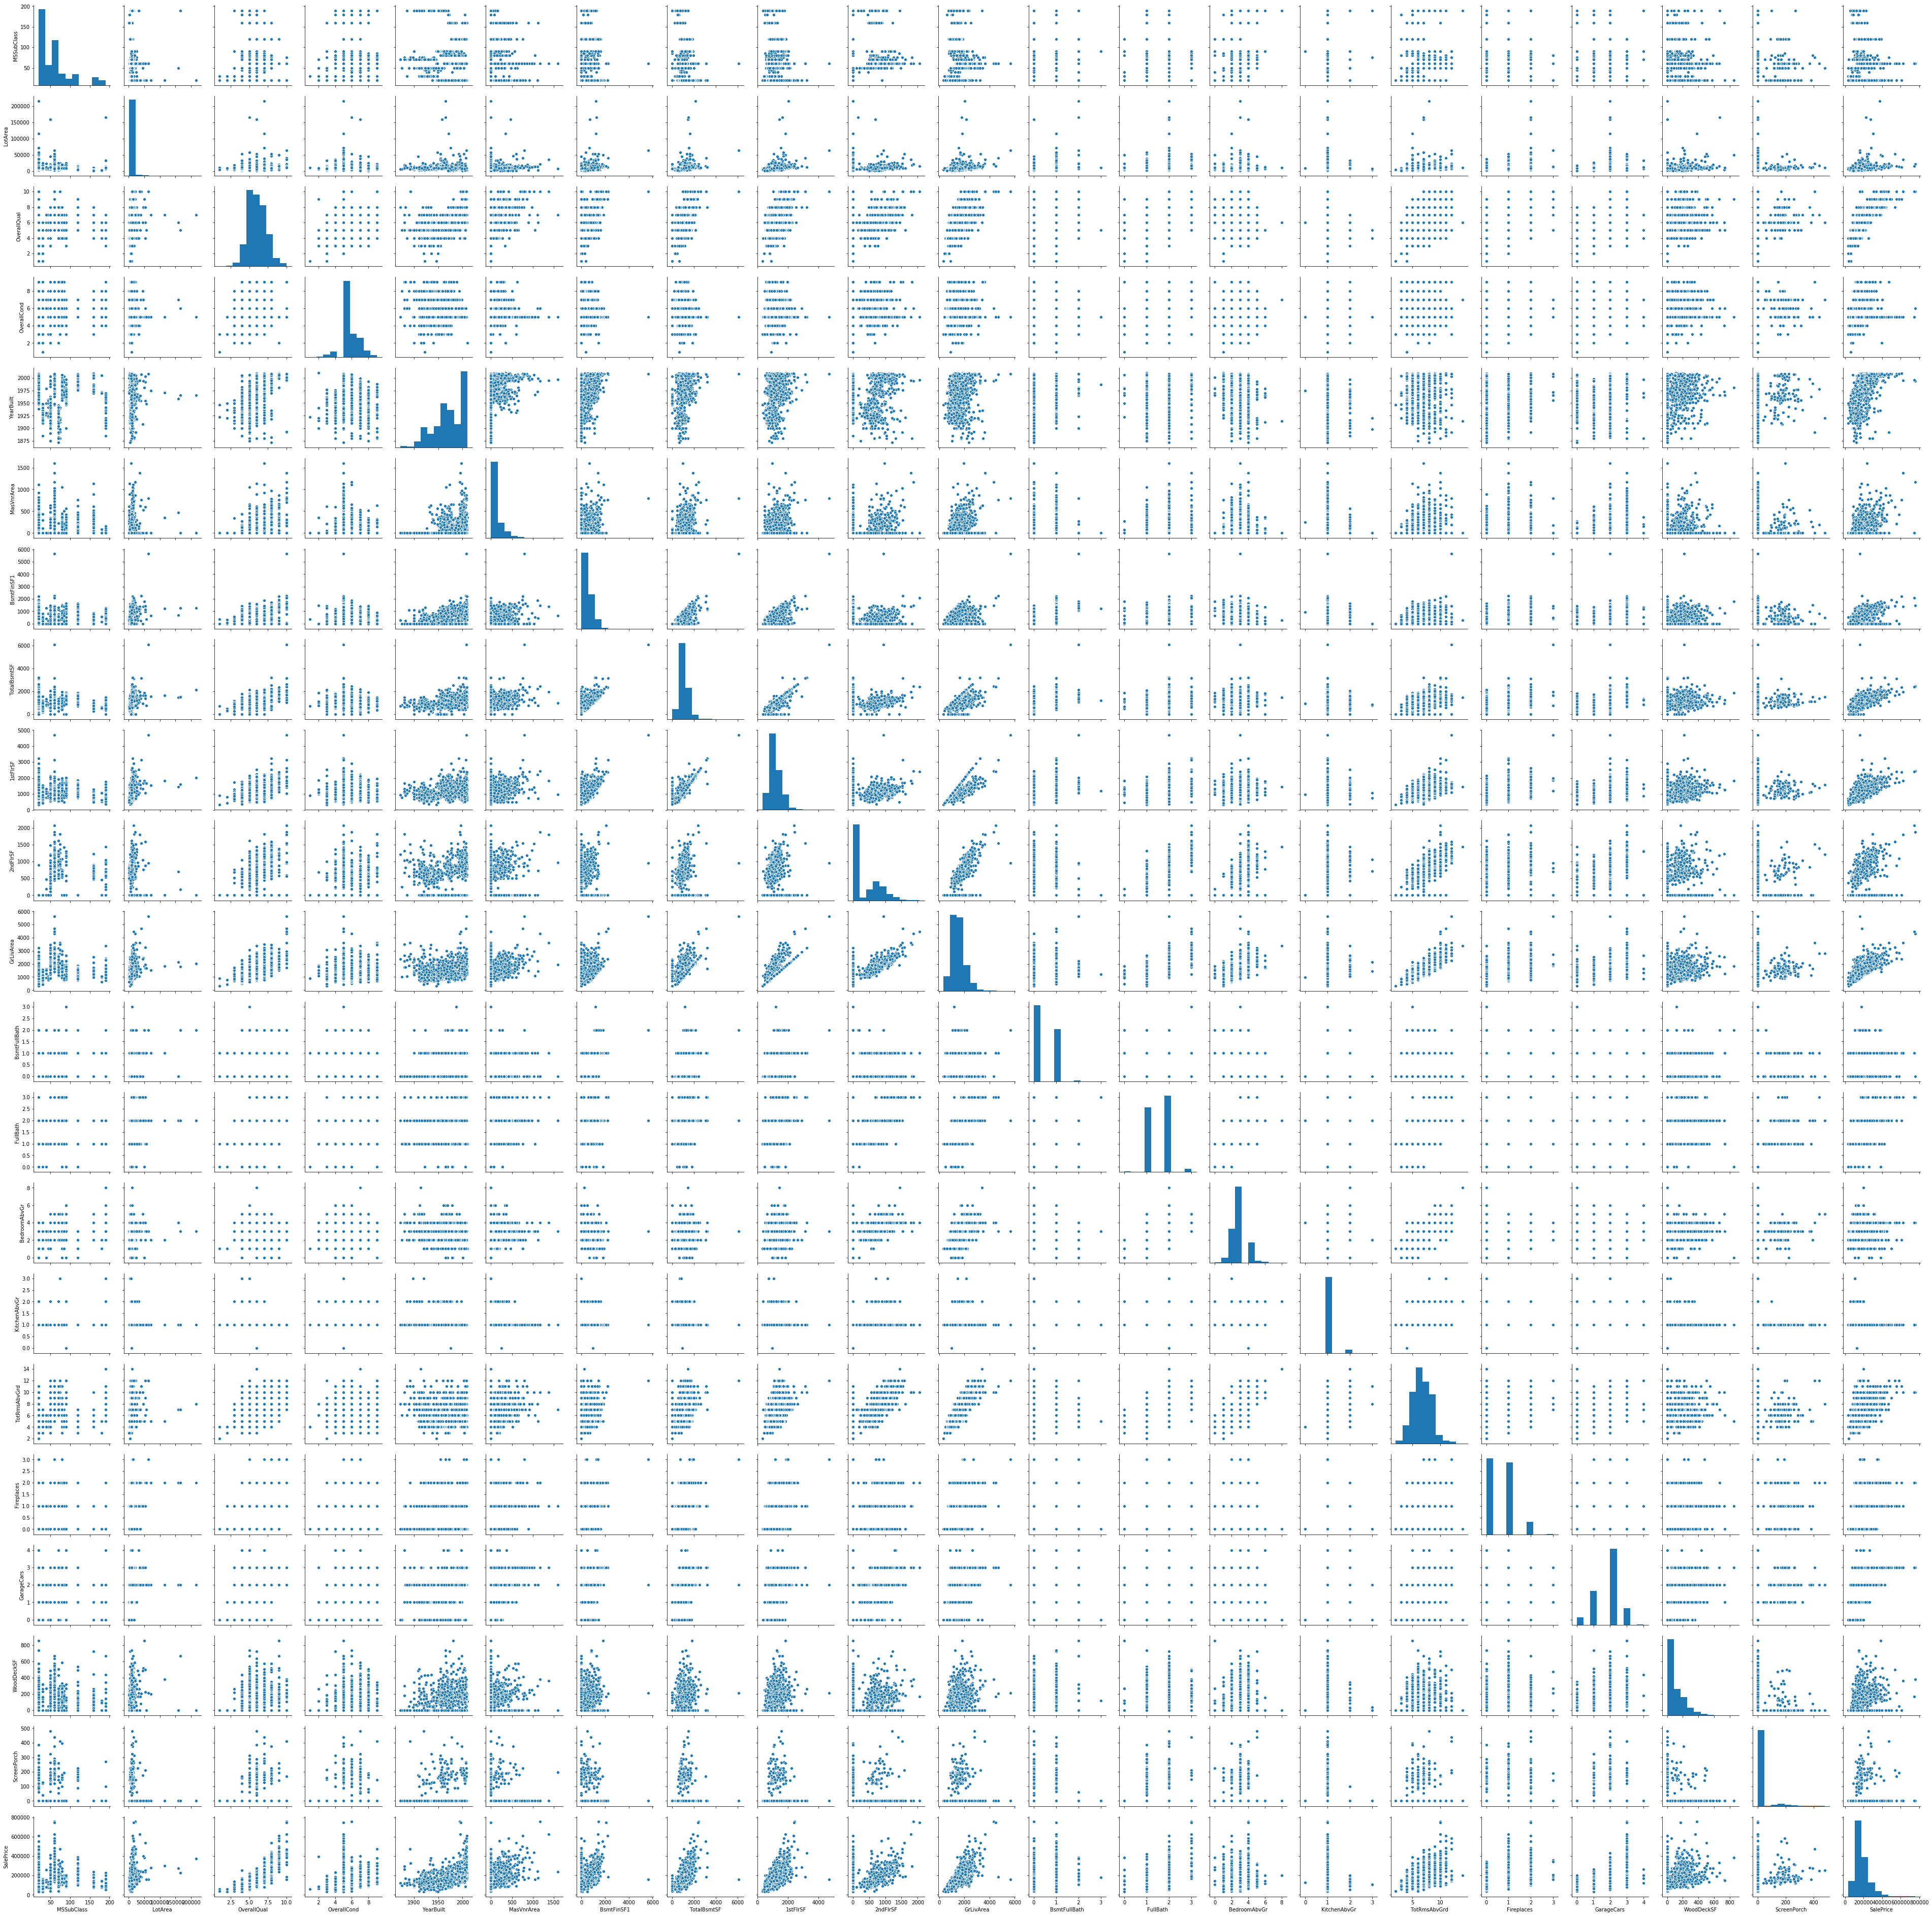

In [0]:
sns.pairplot(data=vals)

The first feature to analyze is 'OverallQuall' which is categorical data. Here, obviously the better the quality the cost is increasing respectively, but, in our case, some good quality houses are still around average cost. It means that 'OverallQual' is not the only criteria for the price of house. Let's observe further

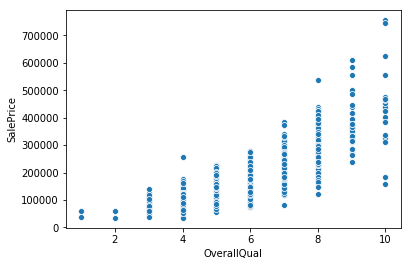

In [0]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=vals)

'TotalBsmtSF' is also grows linearly and a lot of data points are around average. One interesting thing I noticed is the outlier with Total SF more that 6000(the largest building) which got me curious about its sale cost. To compare it with other data, I chose the most expensive houses, their total SF was barely more than 2000.  Even though, the house with 6000 SF is newer than those two houses

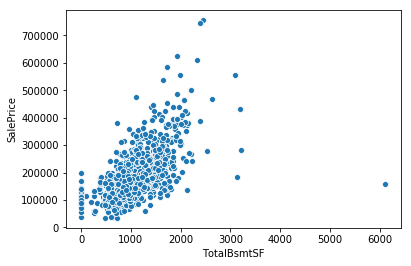

In [0]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=vals)

All three data points seems to be same. Furthemore, according to data advantages of 6000 SF house overweighting in some aspects. But the differences between them are in Condition1. 6000 SF's condition1 is Feedr and other twos are Normal, maybe it could be the key factor in setting the price. 

In [0]:
vals[vals['TotalBsmtSF'] > 6000]


,MSSubClass,LotArea,Street,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,PoolQC,SaleType,SalePrice
1298,60,63887,Pave,Feedr,Norm,10,5,2008,Hip,ClyTile,Stone,796.0,Ex,Gd,5644,6110,4692,950,5642,2,2,3,1,Ex,12,Typ,3,Gd,2,TA,214,0,Gd,New,160000


In [0]:
vals[vals['TotalBsmtSF'] < 3000][vals['SalePrice'] > 700000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,MSSubClass,LotArea,Street,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,PoolQC,SaleType,SalePrice
691,60,21535,Pave,Norm,Norm,10,6,1994,Gable,WdShngl,BrkFace,1170.0,Ex,Gd,1455,2444,2444,1872,4316,0,3,4,1,Ex,10,Typ,2,Ex,3,TA,382,0,NaN,WD,755000
1182,60,15623,Pave,Norm,Norm,10,5,1996,Hip,CompShg,None,0.0,Ex,Av,2096,2396,2411,2065,4476,1,3,4,1,Ex,10,Typ,2,TA,3,TA,171,0,Ex,WD,745000


Sometimes outliers bring noise and can lead to poor predictions, however, sometimes it can hold valuable information. In case of this dataset this exact data point seems to be a noise, because its: a). price is low b). house's area is huge c). it has same characteristics as other more expensive houses.(I might be wrong :)) So, I decided to drop this data point

In [0]:
outlier = vals[vals['TotalBsmtSF'] > 6000].index
vals.drop(outlier, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Lets output graph without this outlier

Here, the picture with 'TotalBsmtSF' has same as 'OveralQual' figure

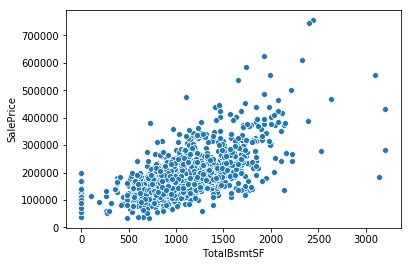

In [0]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=vals)

#### The Condition2 data is not noramlly distributed and a lot of houses have "Norm" in Condition2. It can bring some noise in further model training, so I drop this column too

Seems like 'Condition2' that equals to 'Feedr' are cheaper than other, but in this dataset we don't have enough data with this condition type. To sum up, we have few observations to make a desicion that houses with 'Feedr' condition are realively cheaper than ohter. 

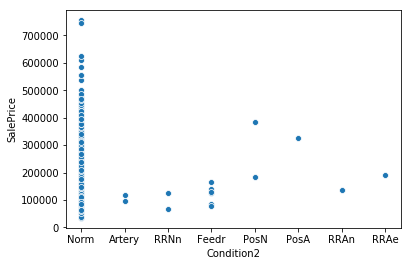

In [0]:
sns.scatterplot(x='Condition2', y='SalePrice', data=vals)

In [0]:
vals.drop('Condition2', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Here, seems like Full bathrooms above grade has some linear pattern, but not as strong as other fields, still it could bring usefull insights for training model

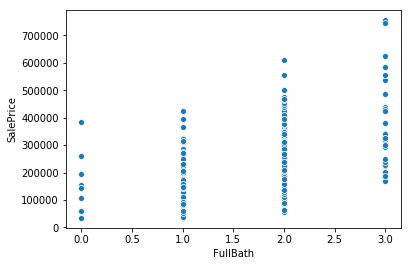

In [0]:
sns.scatterplot(data=vals, x = 'FullBath', y = 'SalePrice')

Now, 'GarageCar' column seems to increase as the capacity of the cars grows, but when 'GarageCar' = 4 the prices are not as we might expect

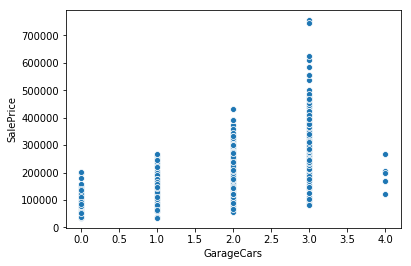

In [0]:
sns.scatterplot(data=vals, x= 'GarageCars', y = 'SalePrice')

Let's see why. 

Turns out those houses with 4 cars capacity garages are old and average quality in most of fields

In [0]:
vals[vals['GarageCars'] == 4]

,MSSubClass,LotArea,Street,Condition1,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,PoolQC,SaleType,SalePrice
420,90,7060,Pave,Norm,7,5,1997,Gable,CompShg,BrkFace,200.0,Gd,Gd,1309,1344,1344,0,1344,2,2,2,2,TA,8,Typ,0,NaN,4,TA,0,0,NaN,WD,206300
747,70,11700,Pave,Norm,7,7,1880,Mansard,CompShg,None,0.0,TA,No,0,1240,1320,1320,2640,0,1,4,1,Gd,8,Typ,1,Gd,4,TA,181,0,NaN,WD,265979
1190,190,32463,Pave,Norm,4,4,1961,Gable,CompShg,Stone,149.0,TA,Av,1159,1249,1622,0,1622,1,1,3,1,TA,7,Typ,1,TA,4,TA,439,0,NaN,WD,168000
1340,20,8294,Pave,Norm,4,5,1971,Gable,CompShg,None,0.0,TA,No,0,858,872,0,872,0,1,3,1,TA,5,Typ,0,NaN,4,TA,0,0,NaN,WD,123000
1350,90,11643,Pave,Artery,5,5,1969,Gable,CompShg,BrkFace,368.0,TA,No,500,1248,1338,1296,2634,1,2,6,2,TA,12,Typ,0,NaN,4,TA,0,0,NaN,WD,200000


In camparison, the houses with garages for 3 cars and considerably expensive, their overall quality in most cases are higher than average and realitivly newer than houses with 4 car spots in garage

In [0]:
vals[vals['GarageCars'] == 3][vals['SalePrice'] >= 600000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,MSSubClass,LotArea,Street,Condition1,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,PoolQC,SaleType,SalePrice
691,60,21535,Pave,Norm,10,6,1994,Gable,WdShngl,BrkFace,1170.0,Ex,Gd,1455,2444,2444,1872,4316,0,3,4,1,Ex,10,Typ,2,Ex,3,TA,382,0,NaN,WD,755000
898,20,12919,Pave,Norm,9,5,2009,Hip,CompShg,Stone,760.0,Ex,Gd,2188,2330,2364,0,2364,1,2,2,1,Ex,11,Typ,2,Gd,3,TA,0,0,NaN,New,611657
1169,60,35760,Pave,Norm,10,5,1995,Hip,CompShg,BrkFace,1378.0,Ex,Gd,1387,1930,1831,1796,3627,1,3,4,1,Gd,10,Typ,1,TA,3,TA,361,0,NaN,WD,625000
1182,60,15623,Pave,Norm,10,5,1996,Hip,CompShg,None,0.0,Ex,Av,2096,2396,2411,2065,4476,1,3,4,1,Ex,10,Typ,2,TA,3,TA,171,0,Ex,WD,745000


The figure of 'GrLivArea'(Above grade (ground) living area square feet) seems to have stronger correlation to SalePrice except outlier in right bottom.

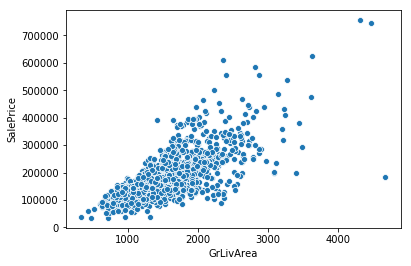

In [0]:
sns.scatterplot(vals['GrLivArea'], vals['SalePrice'])

#### Now, I want to see proportion of the houses at each built year. 

The graph is left-skewed and a lot of houses relatively new

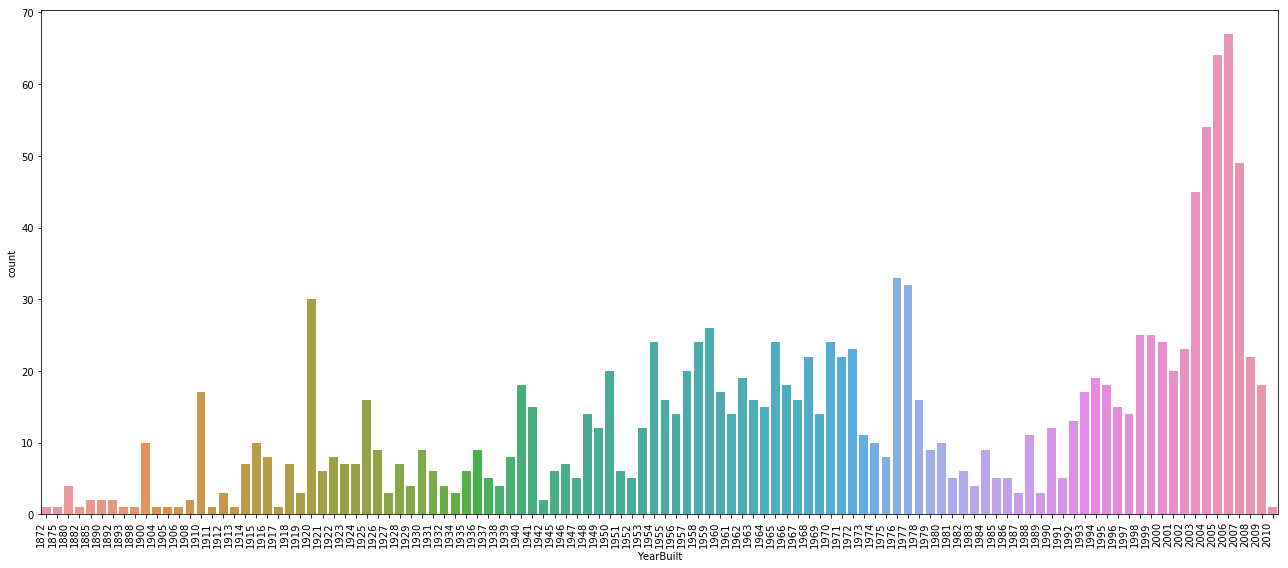

In [0]:
plt.figure(figsize=(18,8))
year_graph = sns.countplot(x='YearBuilt',data=vals)
year_graph.set_xticklabels(year_graph.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

#### Lets build Hypothesis: Does considerable amount of new houses(2000 and newer) are expensive?

In [0]:
h0 = 'Most of the houses built in 2000 and newer are above average in SalePrice'
h1 = 'Most of the houses built in 2000 and newer are not above average in SalePrice: its not the key factor'

all_new_houses = vals[vals['YearBuilt'] >= 2000].count()[0] 
amount_of_new_expensive_houses = all_new_houses - vals[vals['YearBuilt'] >= 2000][vals['SalePrice'] < vals['SalePrice'].mean()].count()[0]
proportion_of_new_exp_houses  = amount_of_new_expensive_houses / all_new_houses 
proportion_of_new_notexp_houses = (vals[vals['YearBuilt'] >= 2000].count()[0] - amount_of_new_expensive_houses) / all_new_houses 

print('All new houses: ', all_new_houses)
print('Number of new houses with above average prices: ', amount_of_new_expensive_houses)
print('Proprotion of new houses with above average prics: ', proportion_of_new_exp_houses)
print('Proportion of new houses with below average prices: ', proportion_of_new_notexp_houses, '\n')

if proportion_of_new_exp_houses > proportion_of_new_notexp_houses: 
  print(h0, '\n') 
else: 
  print(h1, '\n')

All new houses:  387
Number of new houses with above average prices:  300
Proprotion of new houses with above average prics:  0.7751937984496124
Proportion of new houses with below average prices:  0.2248062015503876 

Most of the houses built in 2000 and newer are above average in SalePrice 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


I can assume that the year the house was built is one of the important factors influencing to the price of the house


### Pool Quality is mostly consist of NaNs and I want to check if it somehow affects to the price.


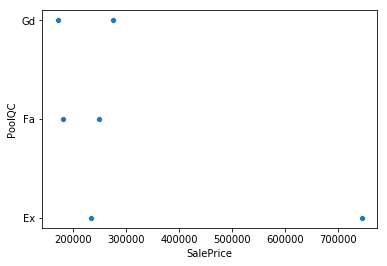

In [0]:
sns.scatterplot(data=vals,x='SalePrice', y='PoolQC')

In [0]:
vals['PoolQC'].value_counts()

Gd    2
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [0]:
vals[vals['PoolQC'].notnull()]

,MSSubClass,LotArea,Street,Condition1,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,PoolQC,SaleType,SalePrice
197,75,25419,Pave,Artery,8,4,1918,Gable,CompShg,None,0.0,TA,No,1036,1360,1360,1360,3112,1,2,4,1,Gd,8,Typ,1,Ex,2,TA,0,0,Ex,WD,235000
810,20,10140,Pave,Norm,6,6,1974,Hip,CompShg,BrkFace,99.0,TA,No,663,1040,1309,0,1309,1,1,3,1,Gd,5,Typ,1,Fa,2,TA,265,0,Fa,WD,181000
1170,80,9880,Pave,Norm,6,6,1977,Gable,CompShg,None,0.0,TA,Av,522,1096,1118,0,1118,1,1,3,1,TA,6,Typ,1,Po,1,TA,203,0,Gd,WD,171000
1182,60,15623,Pave,Norm,10,5,1996,Hip,CompShg,None,0.0,Ex,Av,2096,2396,2411,2065,4476,1,3,4,1,Ex,10,Typ,2,TA,3,TA,171,0,Ex,WD,745000
1386,60,16692,Pave,RRAn,7,5,1978,Gable,CompShg,BrkFace,184.0,Gd,No,790,1392,1392,1392,2784,1,3,5,1,Gd,12,Typ,2,TA,2,TA,0,440,Fa,WD,250000
1423,80,19690,Pave,Norm,6,7,1966,Flat,Tar&Grv,None,0.0,Gd,Av,0,697,1575,626,2201,0,2,4,1,Gd,8,Typ,1,Gd,2,Gd,586,0,Gd,WD,274970


In [0]:
df[vals['PoolQC'].notnull()]['PoolArea']

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

So, turns out PoolQC is missing if house has no pool and its not affecting to the price. Now I am sure in deleting this column.

In [0]:
df['PoolArea'].nunique()

8

In [0]:
vals.drop('PoolQC', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Fireplace Quality has same dependence to Fireblace absence as Pool Quality and knowing that the house has fireplace is enough, so we can drop it too 

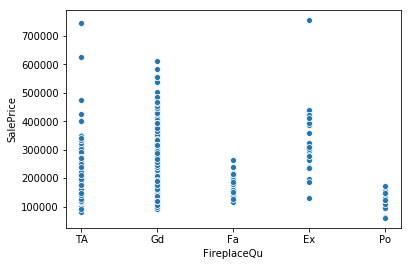

In [0]:
sns.scatterplot(x='FireplaceQu', y='SalePrice', data=vals)

In [0]:
vals.drop('FireplaceQu', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Same with MasVnrArea, but here it somehow affects to the price and most of the houses have masonry, so I can replace NaNs with 0

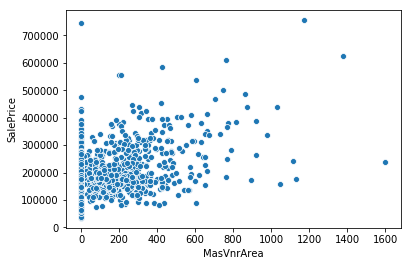

In [0]:
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=vals)

In [0]:
vals[vals['MasVnrArea'].isna()]

,MSSubClass,LotArea,Street,Condition1,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,SaleType,SalePrice
234,60,7851,Pave,Norm,6,5,2002,Gable,CompShg,NaN,NaN,Gd,No,625,860,860,1100,1960,1,2,4,1,Gd,8,Typ,2,2,TA,288,0,WD,216500
529,20,32668,Pave,Norm,6,3,1957,Hip,CompShg,NaN,NaN,TA,No,1219,2035,2515,0,2515,1,3,4,2,TA,9,Maj1,2,2,TA,0,0,WD,200624
650,60,8125,Pave,Norm,7,6,2007,Gable,CompShg,NaN,NaN,Gd,No,0,813,822,843,1665,0,2,3,1,Gd,7,Typ,0,2,TA,0,0,WD,205950
936,20,10083,Pave,Norm,7,5,2003,Gable,CompShg,NaN,NaN,Gd,No,833,1176,1200,0,1200,1,2,2,1,Gd,5,Typ,0,2,TA,0,0,WD,184900
973,20,11639,Pave,Norm,7,5,2007,Gable,CompShg,NaN,NaN,Gd,No,0,1428,1428,0,1428,0,2,3,1,Gd,6,Typ,0,2,TA,0,0,New,182000
977,120,4274,Pave,Norm,7,5,2006,Gable,CompShg,NaN,NaN,Gd,No,1106,1241,1241,0,1241,1,1,1,1,Gd,4,Typ,0,2,TA,0,0,New,199900
1243,20,13891,Pave,Norm,10,5,2006,Gable,CompShg,NaN,NaN,Ex,Gd,1386,2076,2076,0,2076,1,2,2,1,Ex,7,Typ,1,3,TA,216,0,New,465000
1278,60,9473,Pave,Norm,8,5,2002,Gable,CompShg,NaN,NaN,Gd,No,804,1128,1128,903,2031,1,2,3,1,Gd,7,Typ,1,2,TA,0,0,WD,237000


In [0]:
vals['MasVnrArea'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# Data Preparation

In the next steps I perform data preparation for my model to train

#### 1. Turning object values to categorical

In [0]:
cat_cols = list(vals.select_dtypes(include=['object']).columns.values)
vals[cat_cols] = vals[cat_cols].astype('category')
vals.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 32 columns):
MSSubClass      1459 non-null int64
LotArea         1459 non-null int64
Street          1459 non-null category
Condition1      1459 non-null category
OverallQual     1459 non-null int64
OverallCond     1459 non-null int64
YearBuilt       1459 non-null int64
RoofStyle       1459 non-null category
RoofMatl        1459 non-null category
MasVnrType      1451 non-null category
MasVnrArea      1459 non-null float64
BsmtQual        1422 non-null category
BsmtExposure    1421 non-null category
BsmtFinSF1      1459 non-null int64
TotalBsmtSF     1459 non-null int64
1stFlrSF        1459 non-null int64
2ndFlrSF        1459 non-null int64
GrLivArea       1459 non-null int64
BsmtFullBath    1459 non-null int64
FullBath        1459 non-null int64
BedroomAbvGr    1459 non-null int64
KitchenAbvGr    1459 non-null int64
KitchenQual     1459 non-null category
TotRmsAbvGrd    1459 non-null int64
Fun

#### 2. Assign number to each category 

In [0]:
vals[cat_cols] = vals[cat_cols].apply(lambda x: x.cat.codes)
X = vals.iloc[:,1:-1]
y = vals.iloc[:,-1]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Now dataset consists of only numeric data points. It is for model, because machine learning algorithms work only with numbers

In [0]:
vals.head()

,MSSubClass,LotArea,Street,Condition1,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageQual,WoodDeckSF,ScreenPorch,SaleType,SalePrice
0,60,8450,1,2,7,5,2003,1,0,1,196.0,2,3,706,856,856,854,1710,1,2,3,1,2,8,6,0,2,4,0,0,8,208500
1,20,9600,1,1,6,8,1976,1,0,2,0.0,2,1,978,1262,1262,0,1262,0,2,3,1,3,6,6,1,2,4,298,0,8,181500
2,60,11250,1,2,7,5,2001,1,0,1,162.0,2,2,486,920,920,866,1786,1,2,3,1,2,6,6,1,2,4,0,0,8,223500
3,70,9550,1,2,7,5,1915,1,0,2,0.0,3,3,216,756,961,756,1717,1,1,3,1,2,7,6,1,3,4,0,0,8,140000
4,60,14260,1,2,8,5,2000,1,0,1,350.0,2,0,655,1145,1145,1053,2198,1,2,4,1,2,9,6,1,3,4,192,0,8,250000


# Linear Regression

I want to see how linear regression will perform. I know that its not the best choice and linear regression rarely perform good(unless we don't have super linear features), but still Linear Regression is interpretable, i.e. its easy to explain why and how the model gave us exact prediction. However, I wanted to use it just out of curiosity

In [0]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
#Split data to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
# Create regressor object
reg = LinearRegression() 
 
# Fitting data
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predict
y_pred = reg.predict(X_test) 

In [0]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, y_test)))

Mean Absolute Error : 17694.415227287758


Text(0, 0.5, 'Real')

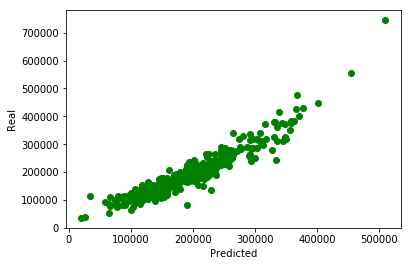

In [0]:
plt.scatter(y_pred, y_test, color='g')
plt.xlabel('Predicted')
plt.ylabel('Real')

Create dataframe from real prices and predicted prices to see how model worked

In [0]:

linear_reg_df = pd.DataFrame(y_test)
linear_reg_df['y_pred'] = y_pred
linear_reg_df

,SalePrice,y_pred
1370,105000,105543.303348
1375,239000,233604.286122
1438,149700,154558.385734
265,175500,206303.348460
126,128000,135731.887958
435,212000,207983.151996
515,402861,370312.466483
609,118500,100513.719494
1288,278000,260552.385111
764,270000,254655.551180


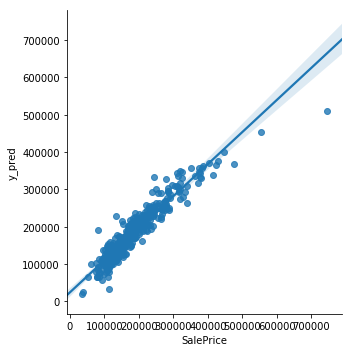

In [0]:
# Plot regression model
sns.lmplot(x='SalePrice', y='y_pred', data=linear_reg_df)

## Seems like Linear Regression did good on this task

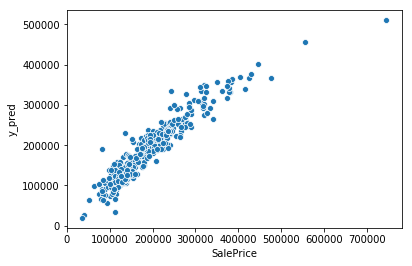

In [0]:
# Scatterplot
sns.scatterplot(x='SalePrice', y='y_pred', data=linear_reg_df)

# Desicion Tree

In [0]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
tree_reg = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
tree_reg.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
y_tree_pred = tree_reg.predict(X_test) 
  
tree_reg_df = pd.DataFrame(y_test)
tree_reg_df['y_pred'] = y_tree_pred
tree_reg_df

,SalePrice,y_pred
1370,105000,105000.0
1375,239000,227000.0
1438,149700,164700.0
265,175500,182900.0
126,128000,152000.0
435,212000,180000.0
515,402861,394432.0
609,118500,148000.0
1288,278000,180000.0
764,270000,236500.0


In [0]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_tree_pred, y_test)))

Mean Absolute Error : 26532.87214611872


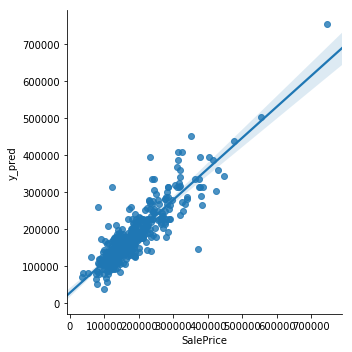

In [0]:
sns.lmplot(x='SalePrice', y='y_pred', data=tree_reg_df)

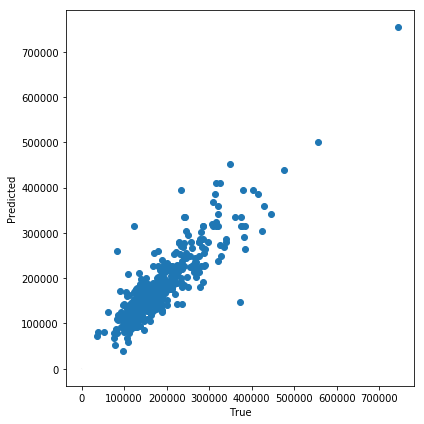

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_tree_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.tight_layout()

# XGBoost

In [0]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions
xgb_pred = xgb_reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(xgb_pred, y_test)))

Mean Absolute Error : 16742.95995647831


In [0]:
xgb_reg_df = pd.DataFrame(y_test)
xgb_reg_df['y_pred'] = xgb_pred
xgb_reg_df

,SalePrice,y_pred
1370,105000,102786.257812
1375,239000,247404.015625
1438,149700,145107.265625
265,175500,187322.984375
126,128000,137489.437500
435,212000,214731.640625
515,402861,406116.968750
609,118500,122920.656250
1288,278000,258680.890625
764,270000,233248.296875


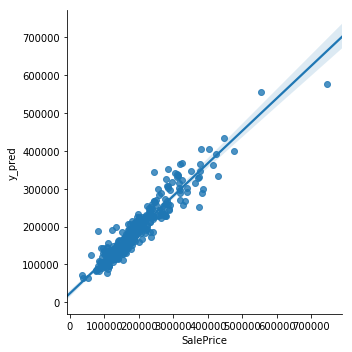

In [0]:
sns.lmplot(x="SalePrice", y='y_pred', data=xgb_reg_df)

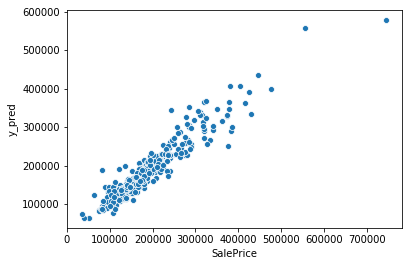

In [0]:
sns.scatterplot(x='SalePrice', y='y_pred', data=xgb_reg_df)

# Lets check the model on the full dataset, before we splitted it to the datasets with useful freatures

Some preprocessing

In [0]:
df.fillna(0, inplace=True)

In [0]:
cat_cols_df = list(df.select_dtypes(include=['object']).columns.values)
df[cat_cols_df] = df[cat_cols_df].astype('category')
df.info()
df[cat_cols_df] = df[cat_cols_df].apply(lambda x: x.cat.codes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null cate

In [0]:

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,...,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,...,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,...,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,...,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,...,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4,250000


In [0]:
# X & Y
df_X = df.iloc[:,1:-1]
df_y = df.iloc[:,-1]


## Linear Regression on full dataset

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3)

reg = LinearRegression() 

reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predict
y_pred = reg.predict(X_test) 

In [0]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, y_test)))

Mean Absolute Error : 19188.76837772232


Text(0, 0.5, 'Real')

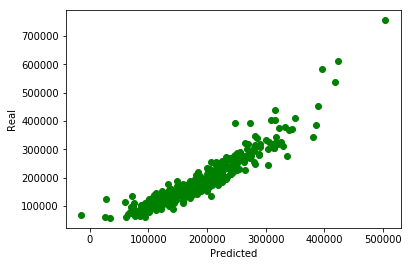

In [0]:
plt.scatter(y_pred, y_test, color='g')
plt.xlabel('Predicted')
plt.ylabel('Real')

Linear Regression performed a little worse in full dataset rather in dataset with selected features

# XGBoost on full dataset

In [0]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:07:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions
xgb_pred = xgb_reg.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(xgb_pred, y_test)))

Mean Absolute Error : 16420.963666523974


In [0]:
xgb_reg_df_1 = pd.DataFrame(y_test)
xgb_reg_df_1['y_pred'] = xgb_pred
xgb_reg_df_1

,SalePrice,y_pred
815,224900,210768.640625
96,214000,235930.234375
419,142000,138024.328125
685,207500,219138.078125
1034,119750,123807.851562
9,118000,138821.437500
282,207500,206280.156250
245,241500,212922.671875
322,301000,262639.312500
474,251000,256079.953125


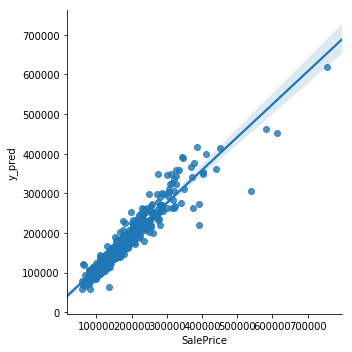

In [0]:
sns.lmplot(x="SalePrice", y='y_pred', data=xgb_reg_df_1)

XGBoost still performs good on full dataset

# **Couple of notes:**

### - I'm still learning and observing so I'd appreciate any feedback 
### - Maybe some of my ideas/thoughts were wrong, so if there's something like that, please, let me know :)

## I hope you enjoyed it, thank you!